Suppose I'm a data scientist at a retail store, and my manager has given me a raw dataset and wants me to prepare it for a future machine learning model that will predict prices. First of all, let's get the dataset from kaggle.

In [2]:
import kagglehub

path = kagglehub.dataset_download("ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning")

print("Path to dataset files:", path)

C:\Users\injik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 221k/221k [00:00<00:00, 14.7MB/s]

Extracting files...
Path to dataset files: C:\Users\injik\.cache\kagglehub\datasets\ahmedmohamed2003\retail-store-sales-dirty-for-data-cleaning\versions\1


In [4]:
import pandas as pd
import os

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

df = pd.read_csv(csv_path)

In [31]:
df.head(50)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Revenue_per_unit,Is_Online
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,18.5,1
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,29.0,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,21.5,1
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,nan,27.5,1
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,12.5,1
5,TXN_7482416,CUST_09,Patisserie,Item_2_BEV,23.0,10.0,230.0,Credit Card,Online,2023-11-30,nan,23.0,1
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True,5.0,0
7,TXN_1372952,CUST_21,Furniture,Item_2_BEV,33.5,6.0,201.0,Digital Wallet,In-store,2024-04-02,True,33.5,0
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False,27.5,0
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False,36.5,1


As we can see, this dataset doesn't use '?' for the missing values, and has column header, so there's no need to change anything in there. Now let's get a deeper look into our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


Now let's do some visualizations. I'll do the numerical histograms now to show total spent, quantity and price per unit distributions one by one, and then the categorical bar charts to show category, payment method and discount applied distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

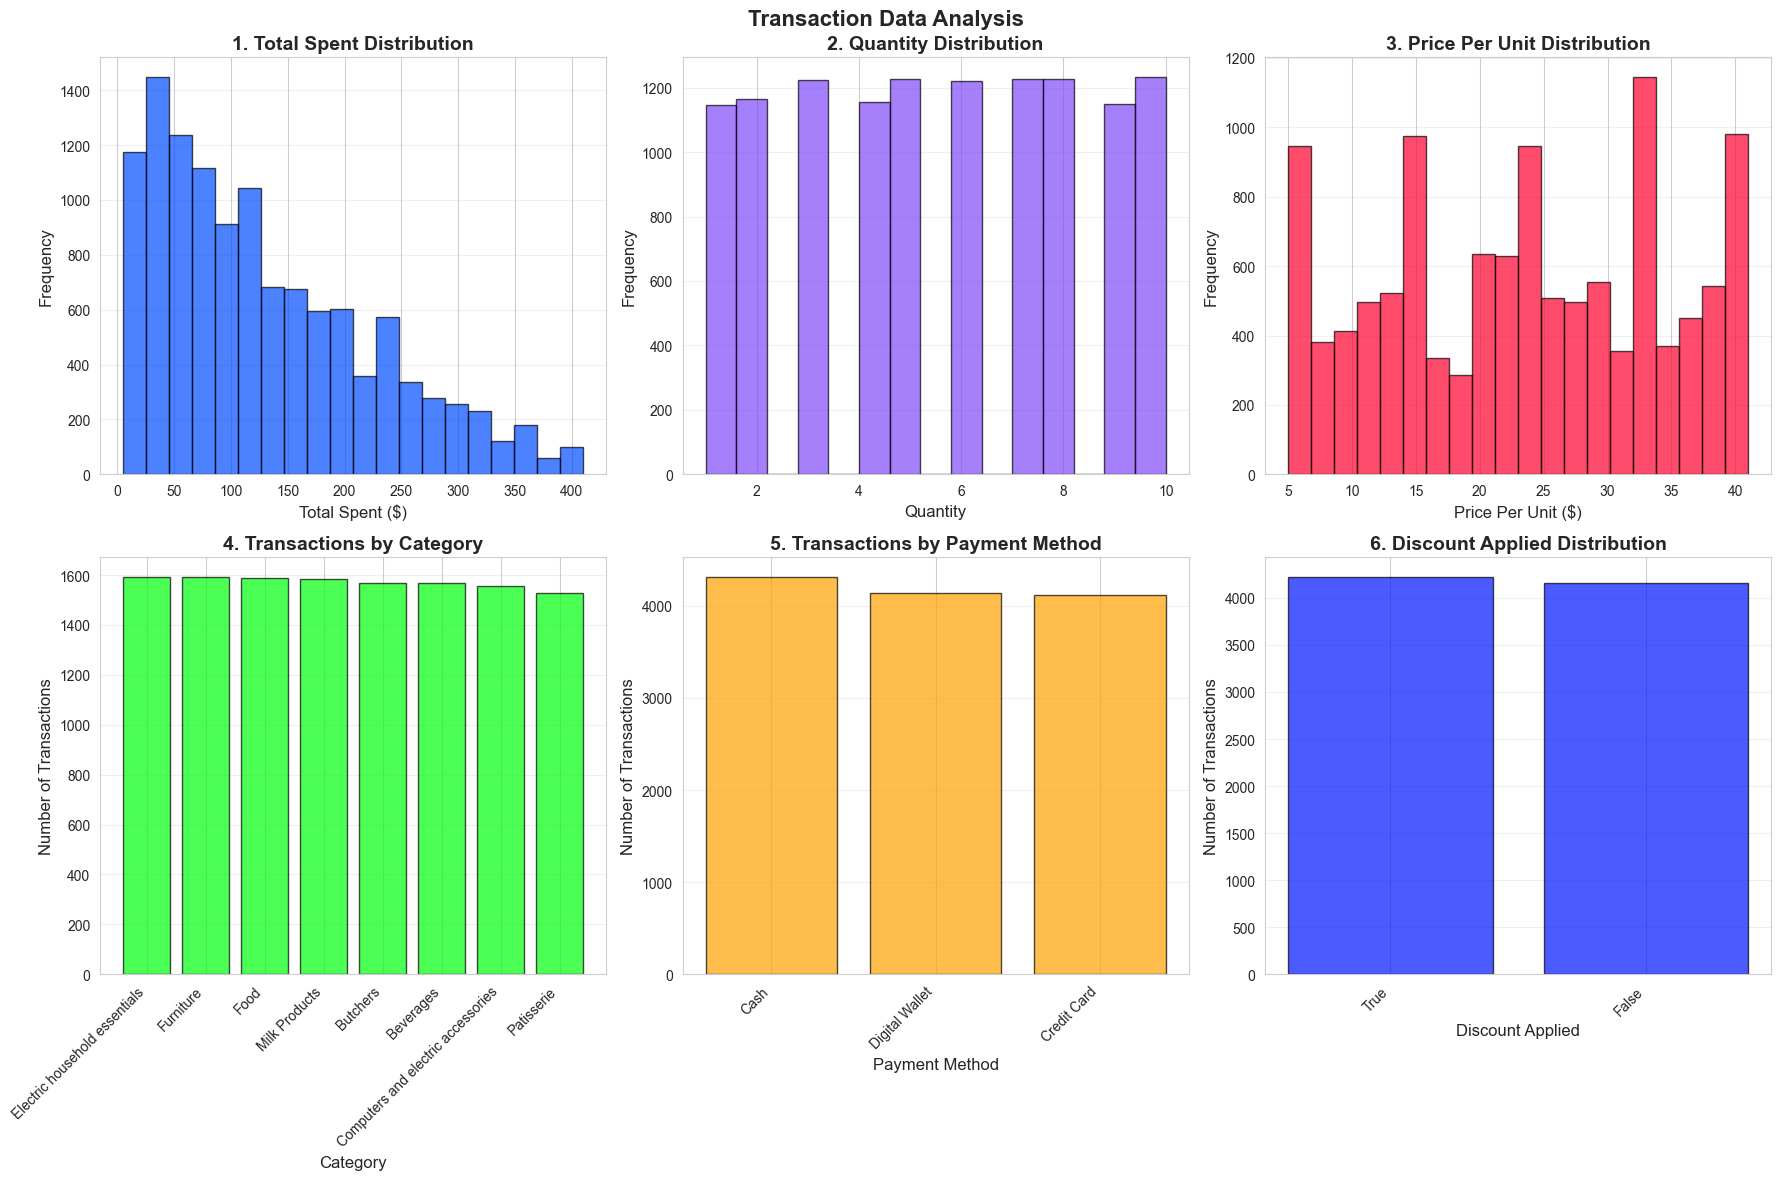

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Transaction Data Analysis', fontsize=16, fontweight='bold')

#histograms

#1
axes[0, 0].hist(df['Total Spent'], bins=20, color="#004cff", edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Total Spent ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('1. Total Spent Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

#2
axes[0, 1].hist(df['Quantity'], bins=15, color="#7f4af9", edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Quantity', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('2. Quantity Distribution', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

#3
axes[0, 2].hist(df['Price Per Unit'], bins=20, color="#ff002f", edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Price Per Unit ($)', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].set_title('3. Price Per Unit Distribution', fontsize=14, fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

#bar charts

#1
category_counts = df['Category'].value_counts()
axes[1, 0].bar(range(len(category_counts)), category_counts.values, color="#00ff0d", edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(category_counts)))
axes[1, 0].set_xticklabels(category_counts.index, rotation=45, ha='right')
axes[1, 0].set_xlabel('Category', fontsize=12)
axes[1, 0].set_ylabel('Number of Transactions', fontsize=12)
axes[1, 0].set_title('4. Transactions by Category', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

#2
payment_counts = df['Payment Method'].value_counts()
axes[1, 1].bar(range(len(payment_counts)), payment_counts.values, color="#ffa200", edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(payment_counts)))
axes[1, 1].set_xticklabels(payment_counts.index, rotation=45, ha='right')
axes[1, 1].set_xlabel('Payment Method', fontsize=12)
axes[1, 1].set_ylabel('Number of Transactions', fontsize=12)
axes[1, 1].set_title('5. Transactions by Payment Method', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

#3
discount_counts = df['Discount Applied'].value_counts()
axes[1, 2].bar(range(len(discount_counts)), discount_counts.values, color="#0015ff", edgecolor='black', alpha=0.7)
axes[1, 2].set_xticks(range(len(discount_counts)))
axes[1, 2].set_xticklabels(discount_counts.index, rotation=45, ha='right')
axes[1, 2].set_xlabel('Discount Applied', fontsize=12)
axes[1, 2].set_ylabel('Number of Transactions', fontsize=12)
axes[1, 2].set_title('6. Discount Applied Distribution', fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show

Now it's time to create a scatter plot, and a correlation heatmap of all numerical columns.

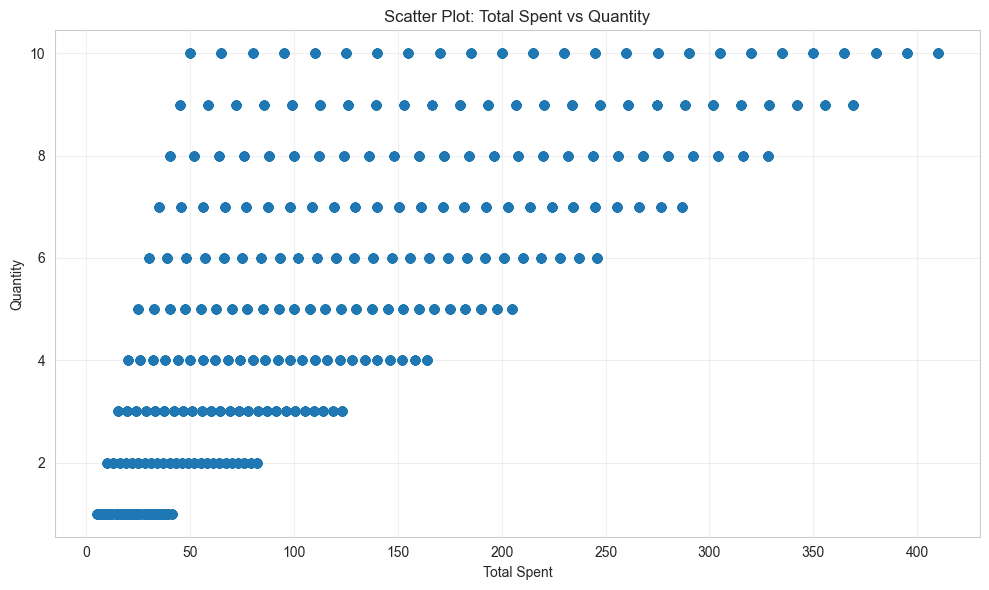

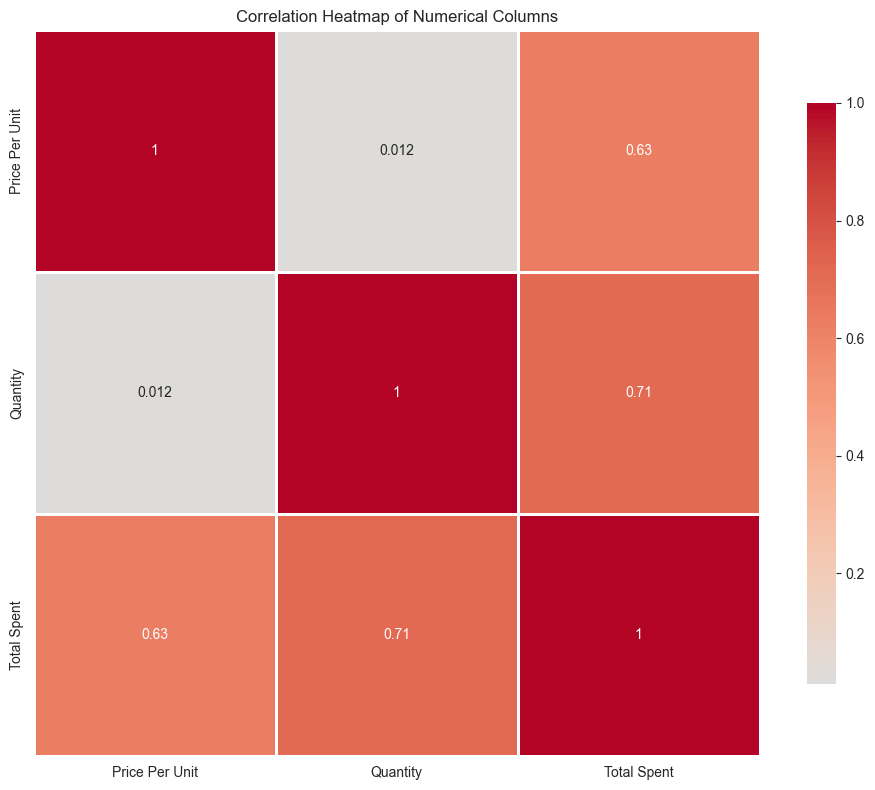

In [23]:
import numpy as np

df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numerical_cols].corr()
avg_corr = corr_matrix.abs().mean().sort_values(ascending=False)
top_2_columns = avg_corr.head(2).index.tolist()

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[top_2_columns[0]], df[top_2_columns[1]], alpha=0.6)
plt.xlabel(top_2_columns[0])
plt.ylabel(top_2_columns[1])
plt.title(f'Scatter Plot: {top_2_columns[0]} vs {top_2_columns[1]}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

As we can see, there are some interesting observations in here. For example, we can see that there is a relationship between total spent and quantity price. We also see that discounts drive sales, and there is a different in category popularity. However, this dataset also contains a lot of missing values (specifically for the columns Item, Price Per Unit, Quantity, Total Spent and Discount Applied with empty strings and NaNs). For Price Per Unit and Quantity I'll use Median, as price has outliers, and quantities are small counts, and median avoids skew. For Item and Discount Applied I'll use Mode, and for Total Spent I'll recalculate price x uantity as it's more accurate than mean/median.

In [26]:
df['Discount Applied'] = df['Discount Applied'].astype(str).str.strip()
df['Discount Applied'].replace({"": np.nan}, inplace=True)

df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

price_median = df['Price Per Unit'].median()
qty_median = df['Quantity'].median()

df['Price Per Unit'].fillna(price_median, inplace=True)
df['Quantity'].fillna(qty_median, inplace=True)
df['Total Spent'] = df['Price Per Unit'] * df['Quantity']

item_mode = df['Item'].mode()[0]
df['Item'].fillna(item_mode, inplace=True)

discount_mode = df['Discount Applied'].mode()[0]
df['Discount Applied'].fillna(discount_mode, inplace=True)

C:\Users\injik\AppData\Local\Temp\ipykernel_14392\687435164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Applied'].replace({"": np.nan}, inplace=True)
C:\Users\injik\AppData\Local\Temp\ipykernel_14392\687435164.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [27]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,nan
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


Now I'll add two new features to this dataset. One will be calles Revenue_per_unit (which will compute efficiency and help us detect pricing anomamlies) and the other one will be Is_online (numeric encoding for the sales channel, which will be useful for modeling and analytics).

In [28]:
df["Revenue_per_unit"] = df["Total Spent"] / df["Quantity"]
df["Is_Online"] = df["Location"].apply(lambda x: 1 if x == "Online" else 0)

df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Revenue_per_unit,Is_Online
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,18.5,1
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,29.0,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,21.5,1
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,nan,27.5,1
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,12.5,1


As we can see, it worked. So let's finish it up by creating a new DataFrame that contains only the features we want to use for a model.

In [30]:
from sklearn.preprocessing import StandardScaler

y = df["Price Per Unit"]

df_features = df.drop(columns=["Price Per Unit", "Transaction ID", "Transaction Date"])
df_encoded = pd.get_dummies(df_features, drop_first=True)
num_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head(50)


,Quantity,Total Spent,Revenue_per_unit,Is_Online,Customer ID_CUST_02,Customer ID_CUST_03,Customer ID_CUST_04,Customer ID_CUST_05,Customer ID_CUST_06,Customer ID_CUST_07,...,Item_Item_9_EHE,Item_Item_9_FOOD,Item_Item_9_FUR,Item_Item_9_MILK,Item_Item_9_PAT,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Online,Discount Applied_True,Discount Applied_nan
0,1.591854,0.594486,-0.462614,0.989479,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,1.233438,1.417678,0.539295,0.989479,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,-1.275479,-0.943584,-0.176354,0.989479,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,1.233438,1.271453,0.396165,0.989479,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
4,0.516605,-0.461583,-1.035133,0.989479,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
5,1.591854,1.081903,-0.033224,0.989479,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
6,0.875021,-0.976078,-1.750782,-1.010633,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
7,0.158188,0.767790,0.968684,-1.010633,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,-1.633895,-1.111471,0.396165,-1.010633,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,-0.917062,-0.223290,1.254944,0.989479,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


And just like that, the dataset is ready for machine learning (I guess).